<a href="https://colab.research.google.com/github/CriptoQuant/Qiskit/blob/main/QPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

In [2]:

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import QFT
import math

In [87]:
n=4
qc = QuantumCircuit(n,n-1)

qc.x(n-1)
qc.barrier()

#Aplicar las puertas H a los qubits
for i in range (n-1):
  qc.h(i)

qc.barrier()

# Aplicar
repetitions = 1
for counting_qubit in range(n-1):
    for i in range(repetitions):
        qc.cp(math.pi/(9/2), counting_qubit, n-1); # controlled-T
    repetitions *= 2
qc.barrier()

# Aplicar QFT inversa
qc = qc.compose(QFT(n-1, inverse = True), list(range(n-1)))
qc.barrier()

# Mediciones
for i in range (n-1):
  qc.measure(i,i)


Resultados: {'101': 1, '100': 3, '110': 4, '010': 6, '000': 15, '011': 2, '111': 4, '001': 989}


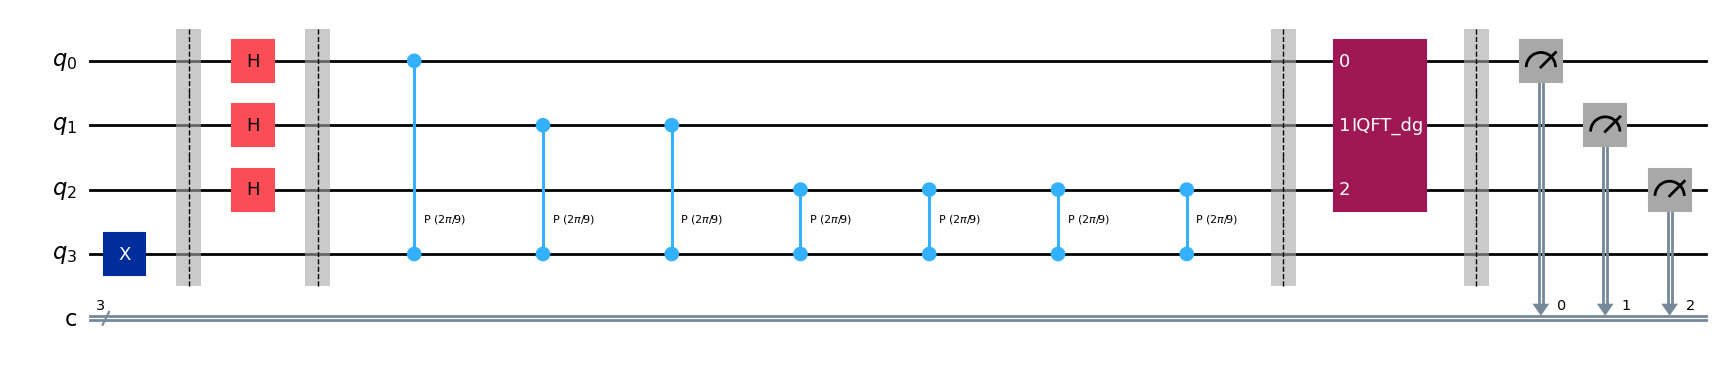

In [88]:
sim = Aer.get_backend('qasm_simulator')

my_circuit = transpile(qc, sim)
job1 = sim.run(my_circuit)

result = job1.result()
counts = result.get_counts()
print("Resultados:", counts)

# Dibujar el circuito
qc.draw('mpl')

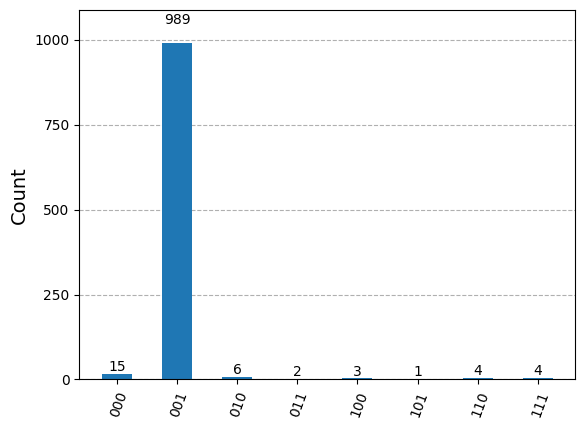

In [89]:
plot_histogram(counts)

In [86]:
max_key = max(counts, key=counts.get)  # Find the key with the maximum value
print("Resultado:",max_key)
print("Objetivo: (1/9) = ", 1/9)

# 1/2^n / n= numero de qubits usados
print ("Comparación con 1/2^3 qubits:", 1/2**(n-1))


Resultado: 000
Objetivo: (1/9) =  0.1111111111111111
Comparación con 1/2^3 qubits: 0.125
